# Exercise 2: Introduction to Structure
Welcome to the second exercise of applied bioinformatics. In the lecture you learned that sequence comparison is not always suffiecent when comparing protein properties. Today it's all about including structural information in your analysis while learning a few new things about python.

## Part 1: Sequence vs. Structure

Go to the [PDB](https://www.rcsb.org/) and search the structures for Hemoglobin in Lamprey (2LHB) and Leghemoglobin in yellow lupin (1LH1). Retrieve the sequences and use the code below to compute the perfect matches. Later on we want to compare this value realative to other scores. Therefore we need to adjust it for the sequence lenght since it is expected, that the number of perfect matches will be increased by chance if the sequences are very long. Add a line of code that is calculating the number of perfect matches by the length of the shorter sequence (matches / min(len(seq_a), len(seq_b)). Note the result.
Now compare the sequence matches of Leghemoglobin in yellow lupin (1LH1) and Leghemoglobin from Glycine max (1FSL) as well and note the adjusted value. Finally do the same again for Hemoglobin in Lamprey (2LHB) and the hemoglobin-like-protein HbO (1NGK).

In [3]:
# sequences
hem_2LHB = 'PIVDTGSVAPLSAAEKTKIRSAWAPVYSTYETSGVDILVKFFTSTPAAQEFFPKFKGLTTADELKKSADVRWHAERIINAVDDAVASMDDTEKMSMKLRNLSGKHAKSFQVDPEYFKVLAAVIADTVAAGDAGFEKLMSMICILLRSAY'
leghem_1LH1 = 'GALTESQAALVKSSWEEFNANIPKHTHRFFILVLEIAPAAKDLFSFLKGTSEVPQNNPELQAHAGKVFKLVYEAAIQLEVTGVVVTDATLKNLGSVHVSKGVADAHFPVVKEAILKTIKEVVGAKWSEELNSAWTIAYDELAIVIKKEMDDAA'
leghem_1FSL = 'VAFTEKQDALVSSSFEAFKANIPQYSVVFYTSILEKAPAAKDLFSFLANGVDPTNPKLTGHAEKLFALVRDSAGQLKASGTVVADAALGSVHAQKAVTDPQFVVVKEALLKTIKAAVGDKWSDELSRAWEVAYDELAAAIKKA'
hem_1NGK = 'MPKSFYDAVGGAKTFDAIVSRFYAQVAEDEVLRRVYPEDDLAGAEERLRMFLEQYWGGPRTYSEQRGHPRLRMRHAPFRISLIERDAWLRCMHTAVASIDSETLDDEHRRELLDYLEMAAHSLVNSPF'

def perfect_matches(str_a, str_b):
  match_count = 0
  for elem_a, elem_b in zip(str_a, str_b):
    match_count += elem_a == elem_b
  return match_count

def normalized_perfect_matches(str_a, str_b):
  return perfect_matches(str_a=str_a, str_b=str_b) / min(len(str_a), len(str_b))

# compute number perfect matches
pmatches = perfect_matches(hem_2LHB, leghem_1LH1)
normal_pmatches = pmatches / min(len(hem_2LHB), len(leghem_1LH1))
print(f"{pmatches} -> {normal_pmatches}")

# adjust number of perfect matches by minimum sequence length

# 1LH1 - FSL
pmatches = perfect_matches(leghem_1LH1, leghem_1FSL)
normal_pmatches = pmatches / min(len(leghem_1LH1), len(leghem_1FSL))
print(f"{pmatches} -> {normal_pmatches}")

# 2LHB - 1NGK
pmatches = perfect_matches(hem_2LHB, hem_1NGK)
normal_pmatches = pmatches / min(len(hem_2LHB), len(hem_1NGK))
print(f"{pmatches} -> {normal_pmatches}")

# example
# eg = pmatches / min(len(), len())


8 -> 0.053691275167785234
34 -> 0.23776223776223776
7 -> 0.0546875


Now that we have an estimate on how well the sequences match lets check the structure similarity using TM align. Go to the PDB [alignment interface](https://www.rcsb.org/alignment) and calculate the TM score for the three combinations (2LHB vs. 1LH1; 1LH1 vs. 1FSL; 2LHB vs. 1NGK). Store the adjusted perfect matches and TM scores in the Dictionary below.

In [4]:
scores = {0.0536: 0.74, 0.2377: 0.83, 0.0546: 0.52}

Finally you have to visualize your results. In the lecture you already got to know a plot in which sequence similarity and structural similarity are compared with each othere. Recreate that with the three datapoints out of the example. You will have to use [matplotplib](https://matplotlib.org/) and its [scatter](https://matplotlib.org/stable/plot_types/basic/scatter_plot.html#sphx-glr-plot-types-basic-scatter-plot-py) function. Import matplotlib and create a scatter plot with the sequence similarity values on the x-axis and the TM scores on the y-axis. Feel free to beutify the plot with Title, axis labels, and colors as you like. What can you deduce from this simple example? Is comparing only protein sequences sufficient in all cases?

Showing screenshots of figures in presentations is usually not a good idea due to the low resolution. Use the [savefig](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html) method to save the plot as a high resolution (set dpi to 300) .png file.

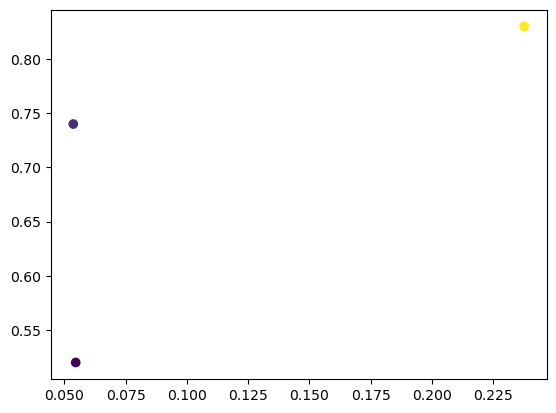

<Figure size 640x480 with 0 Axes>

In [18]:
# Create a scatter plot with matplotlib
import matplotlib.pyplot as plt
import numpy as np

colors = np.random.uniform(15, 80, len(scores.keys()))

fig = plt.figure()
plt.scatter(scores.keys(), scores.values(), c=colors)
plt.show()

# saving the figure
plt.savefig(fname="score-plot.png")

## Part 2: Implement LCS with help of the Internet

Counting perfect matches is underestimating the sequence similarity quite a bit and is not a great measure. As you learned in the first lecture a better measure would be the longest common subsequence or LCS. Luckily you don't have to be an expert in algorithms or Python programming anymore to implement a "standard" algorithm like that. Try to find a solution with the help of google or ChatGTP that implements the LCS algorithm and compute the lenght of the LCS for the three combinations from Part 1. You can either copy (and maybe adapt) a function you have found or install a python package that does the job. Use the new values in order to recreate the scatter plot.

In [19]:
# Implementation of lcs
def longest_common_subsequence(str1, str2):
  # Declaring the array for storing the dp values 
  L = [[None]*(len(str2)+1) for i in range(len(str1)+1)] 

  # Following steps build L[m+1][n+1] in bottom up fashion 
  # Note: L[i][j] contains length of LCS of X[0..i-1] 
  # and Y[0..j-1] 
  for i in range(len(str1)+1): 
      for j in range(len(str2)+1): 
          if i == 0 or j == 0: 
              L[i][j] = 0
          elif str1[i-1] == str2[j-1]: 
              L[i][j] = L[i-1][j-1]+1
          else: 
              L[i][j] = max(L[i-1][j], L[i][j-1]) 

  # L[m][n] contains the length of LCS of X[0..n-1] & Y[0..m-1] 
  return L[len(str1)][len(str2)]

In [35]:
pairs = {(hem_2LHB, leghem_1LH1):0.74, (leghem_1LH1, leghem_1FSL):0.83, (hem_2LHB, hem_1NGK):0.52}

out_data = {}

for pair, pair_similarity in pairs.items():
    out_data[pair_similarity] = longest_common_subsequence(pair[0], pair[1])

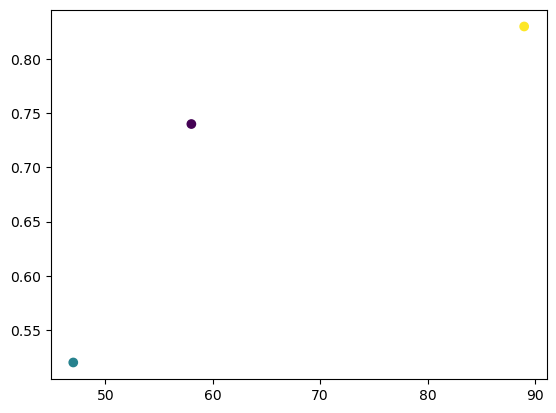

In [37]:
# Create a scatter plot with matplotlib using new values from LCS

colors = np.random.uniform(15, 80, len(scores.keys()))

fig2 = plt.figure()
plt.scatter(out_data.values(), out_data.keys(), c=colors)
plt.show()